# [CptS 215 Data Analytics Systems and Algorithms](https://piazza.com/wsu/fall2017/cpts215/home)
[Washington State University](https://wsu.edu)

[Gina Sprint](http://eecs.wsu.edu/~gsprint/)
# L14-2 Case Study: Web Scraping

Learner objectives for this lesson:
* HTML overview
* Understand the purpose of web scraping
* Implement a web scraper
* Parse HTML using the BeautifulSoup library


## Acknowledgments
Content used in this lesson is based upon information in the following sources:
* [Data Science from Scratch](https://www.amazon.com/Data-Science-Scratch-Principles-Python/dp/149190142X/ref=sr_1_1?ie=UTF8&qid=1491521130&sr=8-1&keywords=joel+grus) by Joel Grus

## HTML Overview
HTML is the standard markup language used to create web pages. HTML is characterized by tags, which are angle brackets < > used to "label" content. You have probably seen HTML before, maybe something like: 

```html
<h1>This is a header</h1>
```

In the above example, the text "This is a header" is labeled as a first (top) level header. 

Let's cover a few HTML basics.

### Header and Trailer
HTML files typically include a *header* (top of the file) that may look like the following:

```html
<!DOCTYPE html>
<html>
<head>
<link rel="stylesheet" href="http://s3.amazonaws.com/codecademy-content/courses/ltp/css/bootstrap.css">
<link rel="shortcut icon" href="http://www.wsulibs.wsu.edu/sites/all/themes/wsulibtest/favicon.ico" type="image/vnd.microsoft.icon" />
<title>Personal Website</title>
</head>
<body>
<div class="container">
```

And a *trailer* (end of the file):
```html
</div>
</body>
</html>
```

### Comments
A comment in HTML begins with `<!––` and ends with `––>`. Comments are visible in the HTML source code, but are not rendered by a browser.

For example, a comment in HTML:

```html
<!-- This is a comment in HTML -->
```

### Section Headers
Section headers are used to label a section. There are 6 different levels of headers:
# Header Level 1
## Header Level 2
### Header Level 3
#### Header Level 4
##### Header Level 5
###### Header Level 6
Each header (except for level 1) represents a sub section of previous, higher level headers. 

A phrase in HTML is specified as a header by beginning with the `<h1>` tag for a header level 1 and ending with the `</h1>` tag. The number of after the "h" in the tag denotes the level of the header. For example, a level 3 header in HTML: 

```html
<h3>This is a level 3 header</h3>
```
would be displayed in a browser as:
### This is a level 3 header

### Paragraphs
A paragraph in HTML is defined with the tag `<p>` and `</p>`. For example:

```html
<p>This is a really short paragraph. Only two sentences!</p>
```

would be displayed in a browser as:
<p>This is a really short paragraph. Only two sentences!</p>

### Unordered Lists
Begin an unordered list (bulleted list) in HTML with the tag `<ul>` and end the list with the tag `</ul>`. In between these tags, preface each item in an unordered list with the tag `<li>` (short for list item) and end the list item with the tag `</li>`. For example:

```html
<ul>
<li>Item1</li>
<li>Item2</li>
<li>Item3</li>
</ul>
```
would be displayed in a browser as:
* Item1
* Item2
* Item3

### Images
To include an image in HTML, like Markdown we need to specify a link to the image with the `<img>` tag. Using the same example:

`<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png">`
would be displayed in a browser as:
<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png">

### Tables
Tables in HTML are used to arrange data into rows and columns of cells. Tables are created using the `<table>` an `</table>` tags. In a table, the `<tr>` and `</tr>` tags create rows in the table. In a row, the `<td>` and `</td>` tags are used to create data cells. For example:

```html
<table>
<tr><td>Row 0 Col 0</td><td>Row 0 Col 1</td><td>Row 0 Col 2</td></tr>
<tr><td>Row 1 Col 0</td><td>Row 1 Col 1</td><td>Row 1 Col 2</td></tr>
</table>
```

would be displayed in a browser as:
<table>
<tr><td>Row 0 Col 0</td><td>Row 0 Col 1</td><td>Row 0 Col 2</td></tr>
<tr><td>Row 1 Col 0</td><td>Row 1 Col 1</td><td>Row 1 Col 2</td></tr>
</table>

### Example
[personal_website.html](https://raw.githubusercontent.com/gsprint23/cpts215/master/lessons/files/personal_website.html) is a simple example HTML file containing some of the above HTML elements. The webpage is a simple personal website with info for Butch T. Cougar, our WSU mascot. You can view an HTML file as text (useful for debugging) and with a web browser to see what it looks like [personal_website.html](http://htmlpreview.github.com/?https://github.com/gsprint23/cpts215/blob/master/lessons/files/personal_website.html).

Note: you can view the HTML for any web page by right clicking on the page and selecting "View page source".

### Learning More HTML
There are lots of create HTML tutorials and references online. I recommend [Codeacademy's HTML and CSS tutorial](https://www.codecademy.com/learn/web) and [Tutorial's Point's HTML tutorial](http://www.tutorialspoint.com/html/).

## Web Scraping
As we saw in a previous case study, we can use [RESTful APIs](https://en.wikipedia.org/wiki/Representational_state_transfer) to query information from a web service such as Google Maps. Google Maps has servers that listen for HTTP requests and respond to the requests accordingly (e.g. with the requested web page, file, and/or data). We can also get data by [*scraping*](https://en.wikipedia.org/wiki/Web_scraping) it from web pages. To web scrape, we fetch the HTML for a web page and parse it on the client side to extract the information we are looking for. Often programmers will write a script that regularly scrapes several web pages, downloading data and looking for changes/updates. Such a program is often called a web crawler or a bot.

Note: When web scraping, we want to make sure we are abiding by the website's rules for web crawlers. This is usually specified in a file called robots.txt hosted on the website. For example, here is the link to [WSU's robots.txt](https://wsu.edu/robots.txt).

You can read more about the purpose of [robots.txt](https://en.wikipedia.org/wiki/Robots_exclusion_standard).

### Requesting a Webpage
Let's work an example where we scrape the WSU Data Analytics webpage: [https://data-analytics.wsu.edu/](https://data-analytics.wsu.edu/). We can use the `urllib` module to request the html of the webpage in the same manner we used the module to query the Google Maps API.

In [1]:
import urllib.request

url = "https://data-analytics.wsu.edu/"
web_obj = urllib.request.urlopen(url)
html = web_obj.read().decode("UTF-8")
web_obj.close()
N = 200
# display the first N characters of the HTML
print(html[:N])
print("********************************")
# display the last N characters of the HTML
print(html[-(N + 1):])

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js no-svg lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]-->
<!--[if IE 7]><html class="no-js no-svg lt-ie9 lt-ie8" lang="en"> <![endif]-->
<!--[if IE 8]><
********************************
themes/spine/js/spine-theme.js?ver=0.27.11-1.6.2-40498'></script>
<script type='text/javascript' src='https://data-analytics.wsu.edu/wp-includes/js/wp-embed.min.js?ver=4.7.4'></script>

</body>
</html>


You can see the header and the trailer in the code. Now, we would likely want to pull some information from the HTML. As you can tell by looking at HTML, this is not as straightforward as we would like it to be. We can make information extraction from the HTML a little bit easier by storing the HTML elements in a tree structure that we can search and index.

### Beautiful Soup
[`Beautiful Soup`](https://www.crummy.com/software/BeautifulSoup/) is a Python library for parsing text into a tree structure. An example tree looks like the following:
<img src="https://www.w3schools.com/js/pic_htmltree.gif">
(image from [https://www.w3schools.com/js/pic_htmltree.gif](https://www.w3schools.com/js/pic_htmltree.gif))

From the Beautiful Soup website: 

>Beautiful Soup is a Python library designed for quick turnaround projects like screen-scraping. Three features make it powerful:

>1. Beautiful Soup provides a few simple methods and Pythonic idioms for navigating, searching, and modifying a parse tree: a toolkit for dissecting a document and extracting what you need. It doesn't take much code to write an application
1. Beautiful Soup automatically converts incoming documents to Unicode and outgoing documents to UTF-8. You don't have to think about encodings, unless the document doesn't specify an encoding and Beautiful Soup can't detect one. Then you just have to specify the original encoding.
1. Beautiful Soup sits on top of popular Python parsers like lxml and html5lib, allowing you to try out different parsing strategies or trade speed for flexibility.

>Beautiful Soup parses anything you give it, and does the tree traversal stuff for you. You can tell it "Find all the links", or "Find all the links of class externalLink", or "Find all the links whose urls match "foo.com", or "Find the table heading that's got bold text, then give me that text."

>Valuable data that was once locked up in poorly-designed websites is now within your reach. Projects that would have taken hours take only minutes with Beautiful Soup.

You can download Beautiful Soup using pip (`pip install beautifulsoup4`) or from the [Beautiful Soup downloads page](https://www.crummy.com/software/BeautifulSoup/bs4/download/). We will also be using the `html5lib` module for HTML parsing. You can download it using `pip install html5lib` or from the [html5lib downloads page](https://pypi.python.org/pypi/html5lib).

With Beautiful Soup and `html5lib`, we can easily search for HTML tags and attributes. In the following example, all paragraphs are found by searching for the `<p>` tag.

In [2]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html5lib')
first_paragraph = soup.find("p")
print(first_paragraph, "\n")
all_paragraphs = soup.find_all("p")
for i, para in enumerate(all_paragraphs):
    # the text attribute of the bs4.element.Tag class stores the paragraph text (no tags)
    print("Paragraph %d\n%s\n\n" %(i, para.text))

<p>Data Analytics tools and techniques are used by many different industries to create, manage, explore, and analyze large, complex datasets, in order to evaluate past performance, predict future trends, and make better decisions. There has been an explosion of demand for skilled data analysts who can communicate, solve problems, and work effectively in teams.</p> 

Paragraph 0
Data Analytics tools and techniques are used by many different industries to create, manage, explore, and analyze large, complex datasets, in order to evaluate past performance, predict future trends, and make better decisions. There has been an explosion of demand for skilled data analysts who can communicate, solve problems, and work effectively in teams.


Paragraph 1
The WSU Data Analytics major, offered jointly by the Department of Mathematics and Statistics in the College of Arts and Sciences and the School of Electrical Engineering and Computer Science in the Voiland College of Engineering and Architectur

## Web Scraping Example
Let's work a more complete web scraping example. This example is adapted from [Data Science from Scratch](https://www.amazon.com/Data-Science-Scratch-Principles-Python/dp/149190142X/ref=sr_1_1?ie=UTF8&qid=1491521130&sr=8-1&keywords=joel+grus) by Joel Grus.

[O'Reilly](https://www.oreilly.com/) is a publishing company that lists its published books on their website: [http://shop.oreilly.com](http://shop.oreilly.com). Suppose we want to specifically look at data-related books: [http://shop.oreilly.com/category/browse-subjects/data.do](http://shop.oreilly.com/category/browse-subjects/data.do). 30 books (or ebooks or videos) are shown per page. [http://shop.oreilly.com/robots.txt](http://shop.oreilly.com/robots.txt) states that we can scrape [http://shop.oreilly.com/category/browse-subjects/data.do](http://shop.oreilly.com/category/browse-subjects/data.do) as long as we don't request a page more often than every 30 seconds. 

Each book/ebook/video listed is stored in a cell in an HTML table. Cells are specified with the `<td>` and `</td>` tags. The specific element class of the table cell for a book/ebook/video is `thumbtext`. If we extract all of the `<td class="thumbtext">` elements from the HTML text and count them, it should sum to 30, the number of books/ebooks/videos displayed per page.

In [3]:
from bs4 import BeautifulSoup
import urllib.request

def get_soup(url):
    '''
    
    '''
    web_obj = urllib.request.urlopen(url)
    html = web_obj.read().decode("UTF-8")
    web_obj.close()

    soup = BeautifulSoup(html, 'html5lib')
    return soup

url = "http://shop.oreilly.com/category/browse-subjects/data.do"
soup = get_soup(url)
tds = soup.find_all("td", "thumbtext")
print("Number of books/ebooks/videos on the first page:", len(tds))

Number of books/ebooks/videos on the first page: 30


Now, we want to only count the paper books and ebooks, not the videos. Each `<td class="thumbtext">` has a `<span>` element tag with class `pricelabel`: `<span class=pricelabel>`. The text of this is the type of book, a colon, and the price of the book/ebook/video stored in another span (`<span class=price>`). 

In [4]:
first_td = tds[0]
pricelabel = first_td.find("span", "pricelabel")
pricelabel = "".join(str(pricelabel).split("\n")) # to make the output shorter
print(pricelabel)

<span class="pricelabel">																															Ebook											:																																													<span class="price"> $26.99</span>																				</span>


If we investigate the different types of books on the webpage (either in HTML or in the browser), we see that videos only have one price label:

<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/lessons/figures/oreilly_books.png" width="700">

So we can find out if a cell stores a video and we can filter out the videos from our list.

In [5]:
def is_video(td):
    '''
    
    '''
    pricelabels = td("span", "pricelabel")
    first_price_label = pricelabels[0].text.strip()
    if len(pricelabels) == 1 and first_price_label.startswith("Video"):
        return True
    return False

non_vids = [td for td in tds if not is_video(td)]
print("Number of books/ebooks on the first page:", len(non_vids))

Number of books/ebooks on the first page: 19


Now, we want to extract information about each book/ebook, including:
* Title
* Author
* Date of publishing

In [6]:
def extract_book_info(td):
    '''
    
    '''
    title = td.find("div", "thumbheader", "a").text.strip()
    author = td.find("div", "AuthorName").text.strip()
    date = td.find("span", "directorydate").text.strip()
    
    info = {"title": title, "author": author, "date": date}
    return info

book_info = [extract_book_info(td) for td in non_vids]
print("First book's info:", book_info[0])

First book's info: {'author': 'By Robert Carver', 'title': 'Preparing Data for Analysis with JMP', 'date': 'May 2017'}


Cool! Now let's extract the book information for *all* of the data books on the O'Reilly website.

In [7]:
import time

def get_number_pages(soup):
    '''
    
    '''
    dirPage = soup.find("td", "default").find("select")
    pages_text = dirPage.find("option").text.strip()
    of_index = pages_text.find("of")
    num_pages = int(pages_text[of_index + 3:])
    return num_pages

def extract_all_books_information():
    '''
    
    '''
    base_url = "http://shop.oreilly.com/category/browse-subjects/data.do?page="
    first_page_soup = get_soup(base_url + "1")
    num_pages = get_number_pages(first_page_soup)
    #num_pages = 2 # for debugging purposes
    books_info = []
    for i in range(1, num_pages + 1):
        paged_url = base_url + str(i)
        soup = get_soup(paged_url)
        for td in soup.find_all("td", "thumbtext"):
            if not is_video(td):
                book_info = extract_book_info(td)
                books_info.append(book_info)
        time.sleep(30) # to comply with robots.txt
    return books_info
    
        
books = extract_all_books_information()
print("Last books info:", books[-1])

Last books info: {'author': 'By Kenneth Goodman, Sergei Nirenburg', 'title': 'The KBMT Project', 'date': 'September 1991'}


Lastly, let's count the number of books published each year and plot the results! We will be able to see the trend in the data books publishing with this plot.

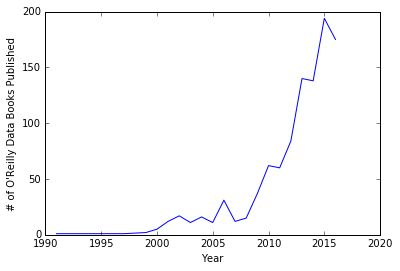

In [8]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

def get_year(book):
    '''
    book is a dictionary
    date is of the form "Month Year"
    '''
    date = book["date"].split(" ")
    year = int(date[1])
    return year

def plot_book_counts(years, counts):
    '''
    
    '''
    plt.plot(years, counts)
    plt.xlabel("Year")
    plt.ylabel("# of O'Reilly Data Books Published")
    plt.show()

years = [get_year(book) for book in books if get_year(book) <= 2016] # only include years with full data
year_counts = Counter(years)
years = sorted(year_counts)
counts = [year_counts[year] for year in years]
plot_book_counts(years, counts)